In [1]:
import torch 

In [2]:
TORCH_VERSION = '.'.join(torch.__version__.split('.')[:2])
CUDA_VERSION = torch.__version__.split('+')[-1]
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.10/index.html


In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [3]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
# outputs = predictor(im)

 ### notes
 1. should build something independent from region feature proposal model 
 2. look at MiDaS decoder/ see how to modify it
 3. still problem of training on server/ conda env/ datasets -> Should be solved soon / not a priority 
 4. Should we understand R-CNN/ Masked rcnn ? -> seems best right now to be able to extract the features -> i.e a rudimentary understanding of the architecture -> extract features
 5. for presentation -> spend some minutes to present the extensive literature review (3 min)
                     -> present what was done -> looking into the MiDaS code 
                                              -> looking into the CA_ZSR code / using matlab -> resulted in problems -> shouldn't have good performance
                                              
                     -> present idea of using detectron -> features
6. hopefully go into superior speed now :)                     

In [4]:
model = predictor.model

In [7]:
model

GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequential(
        (0): BottleneckBlock

In [6]:
from src.datasets.apollo_scape import ApolloScape
from src.datasets.hr_wsi import HRWSI
from src.datasets.red_web import RedWeb

In [7]:
dataset = ApolloScape(remote=True, username='jellouli')

img, disp = next(iter(dataset))

Remote server password: ········


In [8]:
output = predictor(img)

/home/ahmed/miniconda3/lib/python3.9/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/ahmed/miniconda3/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [9]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(output["instances"].to("cpu"))

In [10]:
import matplotlib.pyplot as plt

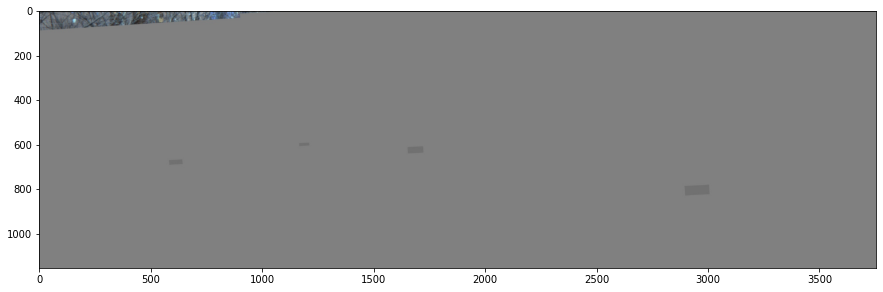

In [11]:
plt.figure(figsize=(15,15))
plt.imshow(out.get_image())

In [12]:
dataset = HRWSI(remote=True, username="jellouli")

Remote server password: ········


In [ ]:
img, disp = next(iter(dataset))

In [ ]:
output = predictor(img)

In [62]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(output["instances"].to("cpu"))

In [63]:
import matplotlib.pyplot as plt

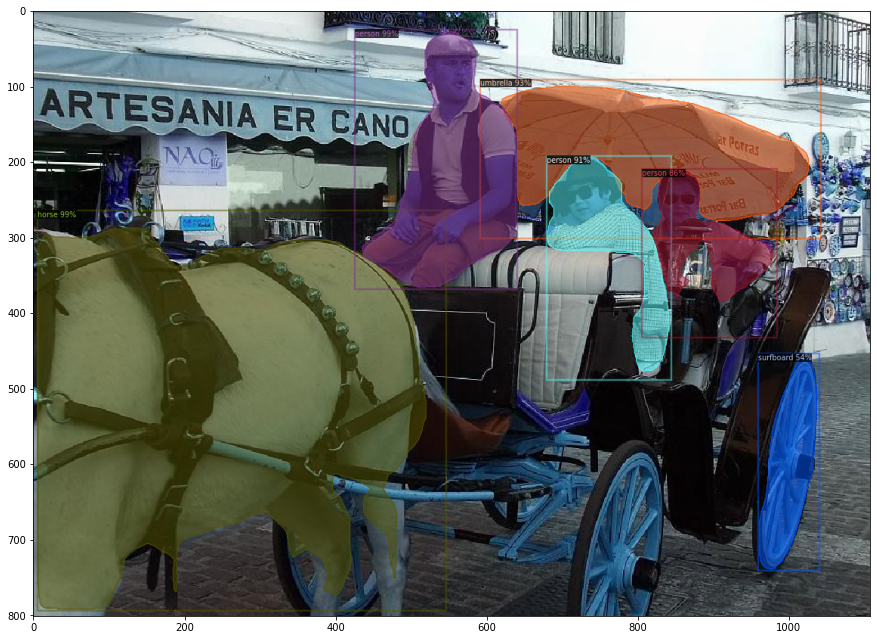

In [64]:
plt.figure(figsize=(15,15))
plt.imshow(out.get_image())

In [ ]:
dataset = RedWeb(remote=True, username="jellouli")

In [ ]:
img, disp = next(iter(dataset))

In [ ]:
output = predictor(img)

In [ ]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(output["instances"].to("cpu"))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(out.get_image())